                review_id                 user_id             business_id  \
0  MhKsttHvo3deXn4qM0-PFw  ecrYpAcwE22gWVsWoNvthQ  pqe1pCQx--uybdm6EQ8AqQ   
1  oakWLs2eYhIHA0KucrRaEA  -psFb4sFsOm0oRLY2Kye0A  AdT6vMVYy2uFFfnYbWoAsw   
2  U5QAKIYquWGtZPqkw52wTQ  IoS8IZai5Yfa3ULgO1ktKw  Ix9p19oZJOdaIGjU9lElyA   
3  nAeBofdKl-1GQiPl7WJb1Q  VhcRO_eyARVDRKvrLLJuCQ  GBTPC53ZrG1ZBY3DT8Mbcw   
4  MP6eIyOlsbBq561crfj15w  z04JR9Gt26vIQHk83PPWBw  PY9GRfzr4nTZeINf346QOw   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       0      0     0   
2      2       1      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                 date  \
0  I love elevation burger but they need to clean...  2016-01-06 21:32:21   
1  This is by far the best pizza place in Henders...  2015-05-17 00:43:46   
2  I've heard a lot about Five Guys for years and...  2012-04-29 01:40:46   
3  Rich and Kenny were awesome

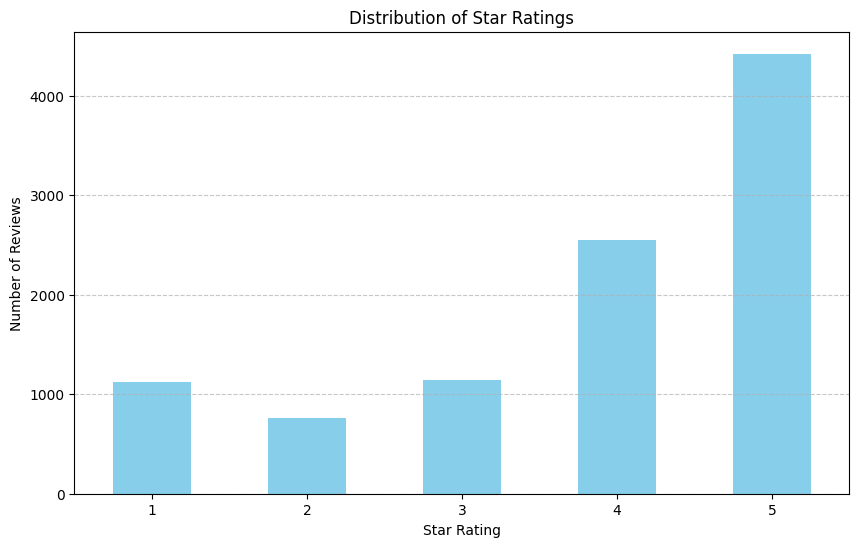

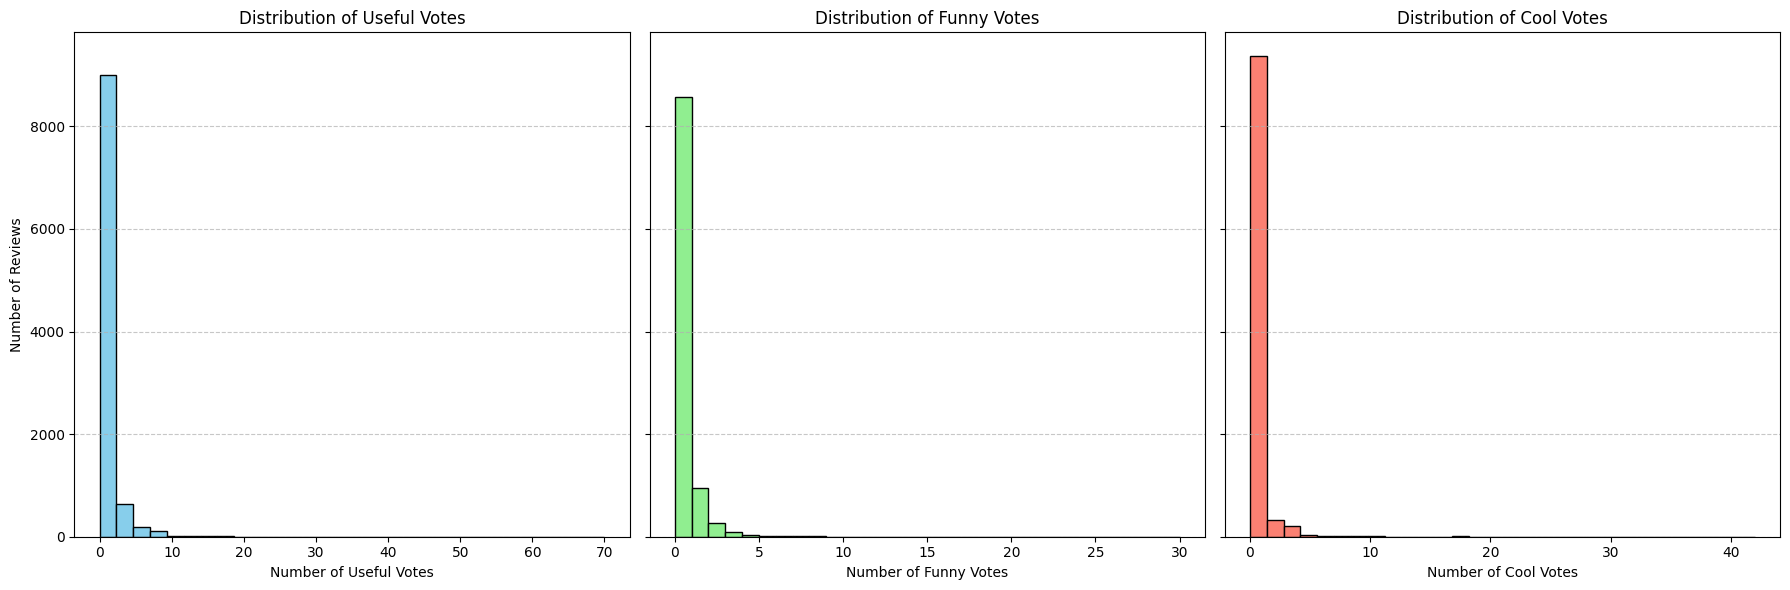

Review Length Statistics:
count    10000.000000
mean       527.999100
std        485.386613
min         28.000000
25%        215.000000
50%        382.000000
75%        666.000000
max       4832.000000
Name: review_length, dtype: float64


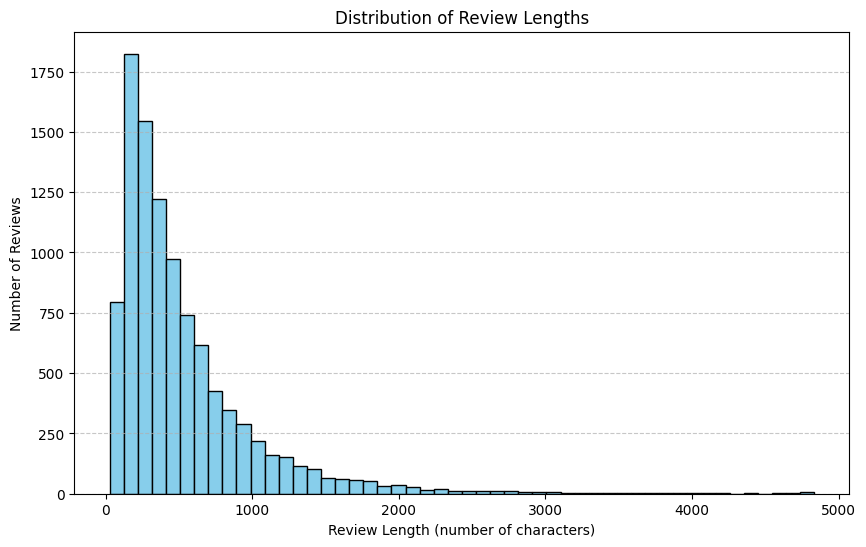

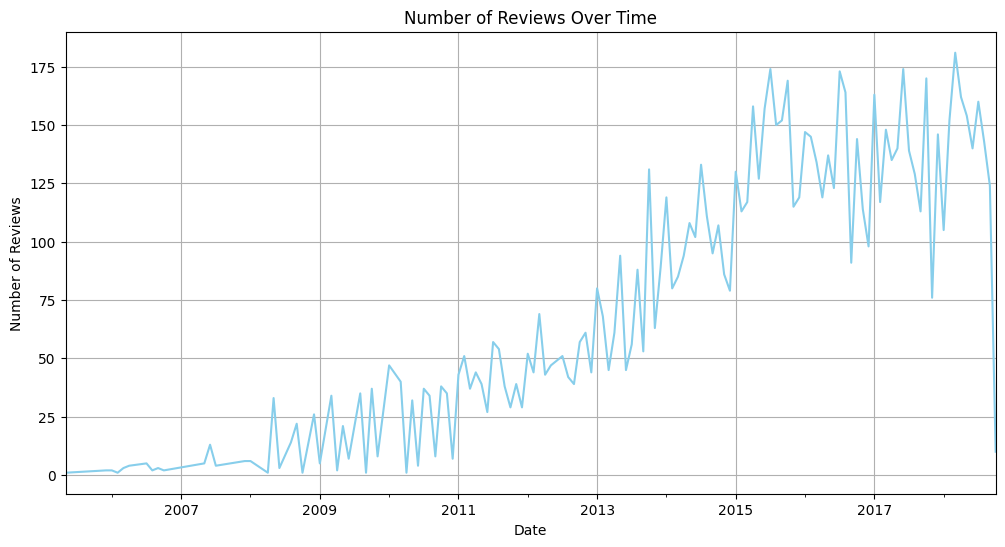

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'yelp_review_cleaned_dataset.csv'
yelp_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(yelp_data.head())

# Summary statistics for numerical columns
summary_stats = yelp_data[['stars', 'useful', 'funny', 'cool']].describe()

# Display the summary statistics
print("Summary Statistics:")
print(summary_stats)

# Plot the distribution of star ratings
plt.figure(figsize=(10, 6))
yelp_data['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the distribution of 'useful', 'funny', and 'cool' votes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Useful votes
axes[0].hist(yelp_data['useful'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Useful Votes')
axes[0].set_xlabel('Number of Useful Votes')
axes[0].set_ylabel('Number of Reviews')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Funny votes
axes[1].hist(yelp_data['funny'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Funny Votes')
axes[1].set_xlabel('Number of Funny Votes')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Cool votes
axes[2].hist(yelp_data['cool'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Distribution of Cool Votes')
axes[2].set_xlabel('Number of Cool Votes')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Calculate the length of each review
yelp_data['review_length'] = yelp_data['cleaned_text'].apply(len)

# Summary statistics for review length
review_length_stats = yelp_data['review_length'].describe()

# Display the summary statistics for review length
print("Review Length Statistics:")
print(review_length_stats)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(yelp_data['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (number of characters)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Convert the 'date' column to datetime format
yelp_data['date'] = pd.to_datetime(yelp_data['date'])

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
yelp_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', color='skyblue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()
